# **Tugas 3 - Reduksi Dimensi dengan Menggunakan Latent Dirichlet Allocation (LDA)**

## **Apa itu LDA?**  
LDA merupakan sebuah model probabilitas generatif dari koleksi data diskrit seperti korpus teks.

## **Tahapan Implementasi LDA**

### Import library yang diperlukan

In [1]:
import numpy as np
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import os

### Download/siapkan data

In [2]:
import gdown
# download data
# https://drive.google.com/file/d/1NjjX22Qcrg4YPjvTm__NaZhDq4liNm6l/view?usp=drive_link
nama_data = '/content/termFreq_Data'
gdown.download(f'https://drive.google.com/uc?id=1NjjX22Qcrg4YPjvTm__NaZhDq4liNm6l', nama_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1NjjX22Qcrg4YPjvTm__NaZhDq4liNm6l
To: /content/termFreq_Data
100%|██████████| 11.8M/11.8M [00:00<00:00, 36.8MB/s]


'/content/termFreq_Data'

In [3]:
import gdown
# download data
# https://drive.google.com/file/d/1NjjX22Qcrg4YPjvTm__NaZhDq4liNm6l/view?usp=drive_link
nama_data = '/content/DataAsli'
gdown.download(f'https://drive.google.com/uc?id=1-IdWAIZ16LN3AqRyoKhrv3Iojggt7hDf', nama_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-IdWAIZ16LN3AqRyoKhrv3Iojggt7hDf
To: /content/DataAsli
100%|██████████| 1.25M/1.25M [00:00<00:00, 119MB/s]


'/content/DataAsli'

### Tampilkan data

In [4]:
termFreq = pd.read_csv("/content/termFreq_Data")
termFreq

,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# menampilkan data asli
dataset = pd.read_csv("/content/DataAsli")
dataset

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,Label
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,RPL
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,RPL
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,KK
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,KK
...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,KK
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,KK
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,KK
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,KK


In [6]:
# # mengambil kolom selain kolom pertama untuk mendapatkan kata dari abstrak
# termFreq_proses = termFreq.iloc[:, 1:]
# termFreq_proses

In [7]:
# ambil label
datalabel = dataset['Label']
datalabel

0      RPL
1      RPL
2      RPL
3       KK
4       KK
      ... 
853     KK
854     KK
855     KK
856     KK
857     KK
Name: Label, Length: 858, dtype: object

### **Proses Latent Dirichlet Allocation (LDA)**

In [16]:
# membuat variable k, alpha dan beta untuk proses LDA

k = 3
alpha = 0.1
beta = 0.2

In [17]:
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)

In [18]:
# # Melatih model LDA pada data TF-IDF
# lda_model.fit_transform(termFreq)

In [19]:
# # mengambil kolom pertama untuk bisa mendapat kolom abstrak

# abstrak = termFreq.iloc[:, 0]
# abstrak

In [20]:
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(termFreq)

In [21]:
proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1','Topik 2','Topik 3'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

,Topik 1,Topik 2,Topik 3
0,0.816668,0.182666,0.000665
1,0.000490,0.000490,0.999021
2,0.973662,0.025789,0.000549
3,0.998510,0.000745,0.000745
4,0.696966,0.000728,0.302305
...,...,...,...
824,0.927809,0.071614,0.000577
825,0.579819,0.419441,0.000739
826,0.000392,0.999216,0.000392
827,0.000473,0.999053,0.000473


In [47]:
df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Label
0,0.011828,0.011828,0.011828,0.011828,0.011828,0.011828,0.011828,0.917207,RPL
1,0.014502,0.014502,0.014502,0.014502,0.014502,0.014502,0.014502,0.898484,RPL
2,0.014584,0.014584,0.014584,0.014584,0.014584,0.014584,0.014584,0.897913,RPL
3,0.016485,0.016485,0.016485,0.016485,0.016485,0.016485,0.016485,0.884602,KK
4,0.013568,0.013568,0.013568,0.013568,0.013568,0.013568,0.013568,0.905025,KK
...,...,...,...,...,...,...,...,...,...
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KK
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KK
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KK
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KK


In [23]:
df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3'],inplace = True)
# Cek kembali nilai NaN
df_final

,Topik 1,Topik 2,Topik 3,Label
0,0.816668,0.182666,0.000665,RPL
1,0.000490,0.000490,0.999021,RPL
2,0.973662,0.025789,0.000549,RPL
3,0.998510,0.000745,0.000745,KK
4,0.696966,0.000728,0.302305,KK
...,...,...,...,...
824,0.927809,0.071614,0.000577,KK
825,0.579819,0.419441,0.000739,KK
826,0.000392,0.999216,0.000392,KK
827,0.000473,0.999053,0.000473,KK


In [24]:
# Proporsi kata pada topik
fitur = termFreq.columns.tolist()
ProporsiKataTopik = lda_model.components_
ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
ProporsiKataTopik_df

,Topik,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,Topik 1,1.186759,2.2,1.2,1.2,0.323342,1.2,1.2,0.2,0.2,...,0.214895,0.2,0.2,0.2,0.202257,0.2,0.2,3.196509,1.189161,1.189161
1,Topik 2,0.213241,0.2,0.2,0.2,2.076658,0.2,0.2,0.2,3.2,...,0.200000,1.2,1.2,16.2,8.197743,3.2,4.2,0.200000,0.200000,0.200000
2,Topik 3,0.200000,0.2,0.2,1.2,0.200000,0.2,2.2,1.2,0.2,...,2.185105,0.2,0.2,0.2,0.200000,0.2,0.2,0.203491,0.210839,0.210839


In [25]:
# # Memberi label pada setiap topik dan menginterpretasikannya
# ProporsiKataTopik_df = ProporsiKataTopik_df.iloc[ : ,1:].astype(float)
# # ProporsiKataTopik_df
# for i, row in ProporsiKataTopik_df.iterrows():
#     topik_label = "Topik " + str(i+1)
#     kata_tertinggi = row.idxmax()
#     bobot_tertinggi = row.max()
#     print(f"{topik_label}: Kata terbanyak adalah '{kata_tertinggi}' dengan bobot {bobot_tertinggi:.2f}")


In [26]:
# / lda.components_.sum(axis=1)[:, np.newaxis]


In [27]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold,train_test_split,cross_val_score

from sklearn.naive_bayes import GaussianNB

In [28]:
#Train and Test split
X = df_final.iloc[:,:3]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
X

,Topik 1,Topik 2,Topik 3
0,0.816668,0.182666,0.000665
1,0.000490,0.000490,0.999021
2,0.973662,0.025789,0.000549
3,0.998510,0.000745,0.000745
4,0.696966,0.000728,0.302305
...,...,...,...
824,0.927809,0.071614,0.000577
825,0.579819,0.419441,0.000739
826,0.000392,0.999216,0.000392
827,0.000473,0.999053,0.000473


In [29]:
nbT3 = GaussianNB()
nbT3.fit(X_train, y_train)
Y_prediction = nbT3.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb3 = round(nbT3.score(X_train, y_train) * 100, 2)
acc_nb3


61.72

4 topik

In [49]:
# 4 topik
# membuat variable k, alpha dan beta untuk proses LDA

k = 4
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(termFreq)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3','Topik 4'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3','Topik 4'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = termFreq.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3','Topik 4'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:4]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
X

nbT4 = GaussianNB()
nbT4.fit(X_train, y_train)
Y_prediction = nbT4.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb4 = round(nbT4.score(X_train, y_train) * 100, 2)
print(acc_nb4 )
accuracy_rf


61.38


59.84

In [31]:
# 6 topik
# membuat variable k, alpha dan beta untuk proses LDA

k = 6
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(termFreq)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3','Topik 4','Topik 5','Topik 6'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3','Topik 4','Topik 5','Topik 6'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = termFreq.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3','Topik 4'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:6]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
print(X)

nbT6 = GaussianNB()
nbT6.fit(X_train, y_train)
Y_prediction = nbT6.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb = round(nbT6.score(X_train, y_train) * 100, 2)
acc_nb

      Topik 1   Topik 2   Topik 3   Topik 4   Topik 5   Topik 6
0    0.000664  0.066055  0.256179  0.000664  0.675774  0.000664
1    0.997556  0.000489  0.000489  0.000489  0.000489  0.000489
2    0.000548  0.997261  0.000548  0.000548  0.000548  0.000548
3    0.000743  0.000743  0.596974  0.000743  0.400054  0.000743
4    0.742944  0.215414  0.039461  0.000727  0.000727  0.000727
..        ...       ...       ...       ...       ...       ...
824  0.064924  0.932771  0.000576  0.000576  0.000576  0.000576
825  0.000738  0.996312  0.000738  0.000737  0.000738  0.000738
826  0.000391  0.000391  0.192672  0.000391  0.000391  0.805763
827  0.000473  0.000473  0.199071  0.000473  0.000473  0.799038
828  0.285084  0.128184  0.333018  0.000660  0.000660  0.252394

[829 rows x 6 columns]


58.97

In [32]:
nbT7 = GaussianNB()
nbT7.fit(X_train, y_train)
Y_prediction = nbT7.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb = round(nbT7.score(X_train, y_train) * 100, 2)
acc_nb

58.97

In [33]:
# TFIDf
import gdown
# download data
# https://drive.google.com/file/d/1BdWsXHxyJ7hP054ZKM0Cv3if3BE222MT/view?usp=sharing
nama_data = '/content/tfidf_Data'
gdown.download(f'https://drive.google.com/uc?id=1BdWsXHxyJ7hP054ZKM0Cv3if3BE222MT', nama_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1BdWsXHxyJ7hP054ZKM0Cv3if3BE222MT
To: /content/tfidf_Data
100%|██████████| 24.8M/24.8M [00:00<00:00, 36.8MB/s]


'/content/tfidf_Data'

In [34]:
tfidf = pd.read_csv("/content/tfidf_Data")
tfidf

,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# ===================== tfidf 3 topik =================
# 3 topik
# membuat variable k, alpha dan beta untuk proses LDA

k = 3
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = tfidf.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:3]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)
print(X)

tfidf_nbT4 = GaussianNB()
tfidf_nbT4.fit(X_train, y_train)
Y_prediction = tfidf_nbT4.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb3 = round(tfidf_nbT4.score(X_train, y_train) * 100, 2)


# KNN
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
Y_pred = knn3.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn3 = round(knn3.score(X_train, y_train) * 100, 2)

print(f'''
tfidf menggunakan 3 topik dan Nb akurasi = {acc_nb3}
tfidf menggunakan 3 topik dan KNN akurasi = {acc_knn3}
''')

      Topik 1   Topik 2   Topik 3
0    0.974848  0.012575  0.012577
1    0.968717  0.015642  0.015641
2    0.968529  0.015736  0.015735
3    0.964055  0.017972  0.017973
4    0.014558  0.970883  0.014559
..        ...       ...       ...
824  0.012377  0.012378  0.975245
825  0.013023  0.973954  0.013023
826  0.011750  0.976497  0.011753
827  0.014592  0.970813  0.014595
828  0.011843  0.976314  0.011844

[829 rows x 3 columns]

tfidf menggunakan 3 topik dan Nb akurasi = 57.93
tfidf menggunakan 3 topik dan KNN akurasi = 76.9



In [36]:
df_final.isna().sum()

Topik 1    0
Topik 2    0
Topik 3    0
Label      0
dtype: int64

In [37]:
# ===================== tfidf 4 topik =================

# membuat variable k, alpha dan beta untuk proses LDA

k = 4
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = tfidf.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:4]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)
print(X)

tfidf_nbT4 = GaussianNB()
tfidf_nbT4.fit(X_train, y_train)
Y_prediction = tfidf_nbT4.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb4 = round(tfidf_nbT4.score(X_train, y_train) * 100, 2)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn4 = KNeighborsClassifier(n_neighbors = 3)
knn4.fit(X_train, y_train)
Y_pred = knn4.predict(X_test)
accuracy_knn4=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn4 = round(knn4.score(X_train, y_train) * 100, 2)

print(f'''
TFIDF menggunakan 4 topik dan Nb akurasi = {acc_nb4}
TFIDF menggunakan 4 topik dan KNN akurasi = {acc_knn4}
''')


      Topik 1   Topik 2   Topik 3   Topik 4
0    0.012415  0.012415  0.012415  0.962755
1    0.015395  0.015395  0.015395  0.953814
2    0.015487  0.015487  0.015487  0.953538
3    0.017649  0.017649  0.017649  0.947052
4    0.014346  0.014346  0.014346  0.956961
..        ...       ...       ...       ...
824  0.128238  0.012224  0.012226  0.847312
825  0.012851  0.012851  0.012851  0.961446
826  0.011612  0.011612  0.011612  0.965165
827  0.014380  0.014380  0.014381  0.956859
828  0.011702  0.011702  0.011702  0.964894

[829 rows x 4 columns]

TFIDF menggunakan 4 topik dan Nb akurasi = 60.86
TFIDF menggunakan 4 topik dan KNN akurasi = 78.45



In [38]:
# ===================== tfidf 5 topik =================

# membuat variable k, alpha dan beta untuk proses LDA

k = 5
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = tfidf.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:5]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)
print(X)

tfidf_nbT5 = GaussianNB()
tfidf_nbT5.fit(X_train, y_train)
Y_prediction = tfidf_nbT5.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb5 = round(tfidf_nbT5.score(X_train, y_train) * 100, 2)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors = 3)
knn5.fit(X_train, y_train)
Y_pred = knn5.predict(X_test)
accuracy_knn5=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn5 = round(knn5.score(X_train, y_train) * 100, 2)

print(f'''
TFIDF menggunakan 5 topik dan Nb akurasi = {acc_nb4}
TFIDF menggunakan 5 topik dan KNN akurasi = {acc_knn5}
''')


      Topik 1   Topik 2   Topik 3   Topik 4   Topik 5
0    0.012263  0.012263  0.950949  0.012263  0.012263
1    0.015162  0.015162  0.939352  0.015162  0.015162
2    0.015251  0.015251  0.938996  0.015251  0.015251
3    0.017343  0.017343  0.930627  0.017343  0.017343
4    0.014143  0.014144  0.943426  0.014143  0.014144
..        ...       ...       ...       ...       ...
824  0.012076  0.012076  0.951695  0.012076  0.012076
825  0.012688  0.012688  0.949247  0.012688  0.012688
826  0.011478  0.011478  0.954087  0.011478  0.011478
827  0.014176  0.014176  0.943295  0.014176  0.014176
828  0.011567  0.011567  0.953734  0.011567  0.011567

[829 rows x 5 columns]

TFIDF menggunakan 5 topik dan Nb akurasi = 60.86
TFIDF menggunakan 5 topik dan KNN akurasi = 74.83



In [39]:
# ===================== tfidf 6 topik =================

# membuat variable k, alpha dan beta untuk proses LDA

k = 6
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = tfidf.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:6]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)
print(X)

tfidf_nbT6 = GaussianNB()
tfidf_nbT6.fit(X_train, y_train)
Y_prediction = tfidf_nbT6.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb6 = round(tfidf_nbT6.score(X_train, y_train) * 100, 2)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn6 = KNeighborsClassifier(n_neighbors = 3)
knn6.fit(X_train, y_train)
Y_pred = knn6.predict(X_test)
accuracy_knn6=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn6 = round(knn6.score(X_train, y_train) * 100, 2)

print(f'''
TFIDF menggunakan 6 topik dan Nb akurasi = {acc_nb6}
TFIDF menggunakan 6 topik dan KNN akurasi = {acc_knn6}
''')


      Topik 1   Topik 2   Topik 3   Topik 4   Topik 5   Topik 6
0    0.012116  0.012114  0.939427  0.012114  0.012114  0.012114
1    0.014937  0.014936  0.925321  0.014936  0.014936  0.014936
2    0.015023  0.015022  0.924890  0.015022  0.015022  0.015022
3    0.017049  0.017047  0.914761  0.017047  0.017047  0.017047
4    0.013948  0.013946  0.930268  0.013946  0.013946  0.013946
..        ...       ...       ...       ...       ...       ...
824  0.011934  0.406385  0.545885  0.011932  0.011932  0.011932
825  0.619916  0.012529  0.329967  0.012529  0.012529  0.012529
826  0.625600  0.011348  0.329008  0.011348  0.011348  0.011348
827  0.930093  0.013980  0.013993  0.013978  0.013978  0.013978
828  0.011481  0.265662  0.688554  0.011435  0.011434  0.011434

[829 rows x 6 columns]

TFIDF menggunakan 6 topik dan Nb akurasi = 63.79
TFIDF menggunakan 6 topik dan KNN akurasi = 77.41



In [40]:
# ===================== tfidf 7 topik =================

# membuat variable k, alpha dan beta untuk proses LDA

k = 7
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6','Topik 7'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6','Topik 7'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = tfidf.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:7]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)
print(X)

tfidf_nbT7 = GaussianNB()
tfidf_nbT7.fit(X_train, y_train)
Y_prediction = tfidf_nbT7.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb7 = round(tfidf_nbT7.score(X_train, y_train) * 100, 2)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn7 = KNeighborsClassifier(n_neighbors = 3)
knn7.fit(X_train, y_train)
Y_pred = knn7.predict(X_test)
accuracy_knn7=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn7 = round(knn7.score(X_train, y_train) * 100, 2)

print(f'''
TFIDF menggunakan 7 topik dan Nb akurasi = {acc_nb7}
TFIDF menggunakan 7 topik dan KNN akurasi = {acc_knn7}
''')


      Topik 1   Topik 2   Topik 3   Topik 4   Topik 5   Topik 6   Topik 7
0    0.011969  0.011970  0.011969  0.011969  0.011969  0.011969  0.928185
1    0.014716  0.014716  0.014716  0.014716  0.014716  0.014716  0.911705
2    0.014800  0.014800  0.014800  0.014800  0.014800  0.014800  0.911202
3    0.016762  0.016762  0.016762  0.016762  0.016762  0.016762  0.899429
4    0.013754  0.013754  0.013754  0.013754  0.013754  0.013754  0.917473
..        ...       ...       ...       ...       ...       ...       ...
824  0.011791  0.011791  0.011791  0.011792  0.011791  0.011791  0.929251
825  0.012374  0.012374  0.012374  0.012374  0.012374  0.012374  0.925755
826  0.011221  0.011221  0.011221  0.011221  0.011221  0.011221  0.932676
827  0.013785  0.013785  0.013785  0.013785  0.013785  0.013785  0.917288
828  0.011305  0.011305  0.011305  0.011305  0.011305  0.011305  0.932169

[829 rows x 7 columns]

TFIDF menggunakan 7 topik dan Nb akurasi = 62.07
TFIDF menggunakan 7 topik dan KNN akur

In [41]:
# ===================== tfidf 8 topik =================

# membuat variable k, alpha dan beta untuk proses LDA

k = 8
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6','Topik 7','Topik 8'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6','Topik 7','Topik 8'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = tfidf.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:8]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)
print(X)

tfidf_nbT8 = GaussianNB()
tfidf_nbT8.fit(X_train, y_train)
Y_prediction = tfidf_nbT8.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb8 = round(tfidf_nbT8.score(X_train, y_train) * 100, 2)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn8 = KNeighborsClassifier(n_neighbors = 3)
knn8.fit(X_train, y_train)
Y_pred = knn8.predict(X_test)
accuracy_knn8=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn8 = round(knn8.score(X_train, y_train) * 100, 2)

print(f'''
TFIDF menggunakan 8 topik dan Nb akurasi = {acc_nb8}
TFIDF menggunakan 8 topik dan KNN akurasi = {acc_knn8}
''')


      Topik 1   Topik 2   Topik 3   Topik 4   Topik 5   Topik 6   Topik 7  \
0    0.011828  0.917206  0.011828  0.011828  0.011828  0.011828  0.011828   
1    0.014502  0.898483  0.014502  0.014502  0.014502  0.014502  0.014502   
2    0.014584  0.897914  0.014584  0.014584  0.014584  0.014584  0.014584   
3    0.016485  0.884602  0.016486  0.016485  0.016485  0.016485  0.016485   
4    0.013568  0.905025  0.013568  0.013568  0.013568  0.013568  0.013568   
..        ...       ...       ...       ...       ...       ...       ...   
824  0.338414  0.591662  0.011654  0.011654  0.011654  0.011655  0.011654   
825  0.012223  0.914423  0.012228  0.012223  0.012223  0.012223  0.012223   
826  0.011096  0.795902  0.011099  0.011096  0.011096  0.137517  0.011096   
827  0.013598  0.581320  0.013599  0.013598  0.013598  0.337092  0.013598   
828  0.011179  0.735401  0.011181  0.011179  0.011179  0.011179  0.011179   

      Topik 8  
0    0.011828  
1    0.014502  
2    0.014584  
3    0.0164

In [42]:
# ===================== tfidf 8 topik =================

# membuat variable k, alpha dan beta untuk proses LDA

k = 8
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(tfidf)

proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6','Topik 7','Topik 8'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

df_final = pd.concat([proporsi_topik_dokumen_df,datalabel],axis=1)
df_final

df_final.isna()
df_final.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Topik 4', 'Topik 5', 'Topik 6','Topik 7','Topik 8'],inplace = True)
# Cek kembali nilai NaN
df_final

# # Proporsi kata pada topik
# fitur = tfidf.columns.tolist()
# ProporsiKataTopik = lda_model.components_
# ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
# ProporsiKataTopik_df.insert(0,'Topik',['Topik 1', 'Topik 2', 'Topik 3'])
# ProporsiKataTopik_df

#Train and Test split
X = df_final.iloc[:,:8]
y = df_final['Label']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)
print(X)

tfidf_nbT8 = GaussianNB()
tfidf_nbT8.fit(X_train, y_train)
Y_prediction = tfidf_nbT8.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb8 = round(tfidf_nbT8.score(X_train, y_train) * 100, 2)
print(f'''
TFIDF menggunakan 6 topik dan Nb akurasi = {acc_nb8}
''')


      Topik 1   Topik 2   Topik 3   Topik 4   Topik 5   Topik 6   Topik 7  \
0    0.011828  0.011828  0.011828  0.011828  0.011828  0.011828  0.011828   
1    0.014502  0.014502  0.014502  0.014502  0.014502  0.014502  0.014502   
2    0.014584  0.014584  0.014584  0.014584  0.014584  0.014584  0.014584   
3    0.016485  0.016485  0.016485  0.016485  0.016485  0.016485  0.016485   
4    0.013568  0.013568  0.013568  0.013568  0.013568  0.013568  0.013568   
..        ...       ...       ...       ...       ...       ...       ...   
824  0.011655  0.011654  0.011654  0.011654  0.284909  0.011654  0.011654   
825  0.012223  0.012223  0.012223  0.012223  0.012223  0.012223  0.012223   
826  0.011096  0.011096  0.011096  0.011096  0.011096  0.011096  0.011096   
827  0.013598  0.013598  0.013598  0.013598  0.013598  0.013598  0.013598   
828  0.011179  0.011179  0.011179  0.011179  0.011179  0.011179  0.011179   

      Topik 8  
0    0.917207  
1    0.898484  
2    0.897913  
3    0.8846

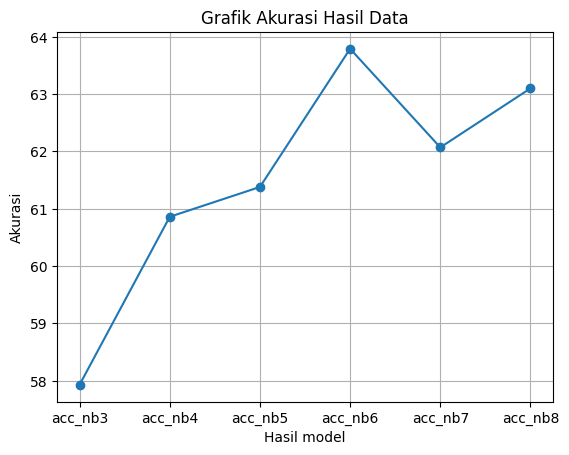

In [43]:
import matplotlib.pyplot as plt

# Contoh data akurasi (ganti dengan data akurasi Anda)
hasil_akurasi = [acc_nb3, acc_nb4, acc_nb5, acc_nb6, acc_nb7, acc_nb8]

# Nomor iterasi atau label untuk setiap hasil akurasi (misalnya, iterasi 1, iterasi 2, dst.)
nomor_iterasi = ['acc_nb3', 'acc_nb4', 'acc_nb5', 'acc_nb6', 'acc_nb7', 'acc_nb8']

# Membuat plot
plt.plot(nomor_iterasi, hasil_akurasi, marker='o', linestyle='-')

# Menambahkan label sumbu x dan y
plt.xlabel('Hasil model')
plt.ylabel('Akurasi')

# Menambahkan judul plot
plt.title('Grafik Akurasi Hasil Data')

# Menampilkan grid (opsional)
plt.grid(True)

# Menampilkan plot
plt.show()


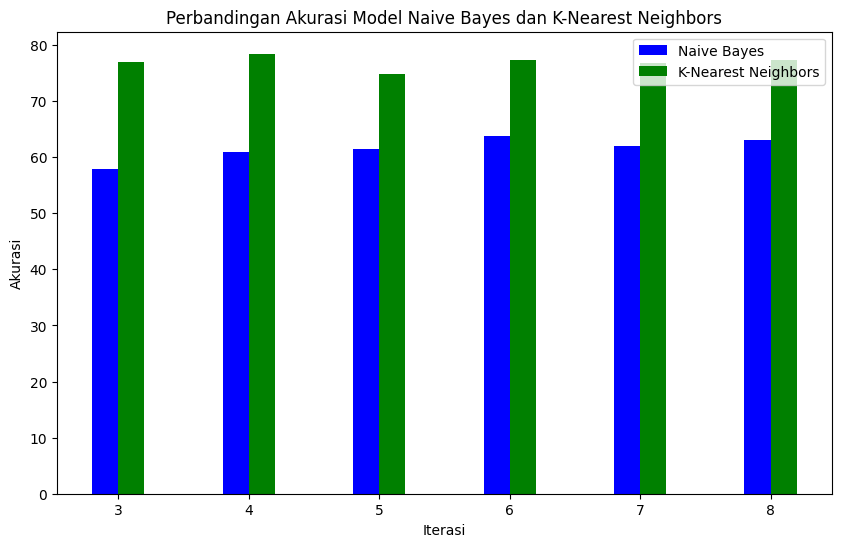

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Hasil akurasi Model Naive Bayes dan Model KNN (ganti dengan hasil akurasi Anda)
akurasi_nb = [acc_nb3, acc_nb4, acc_nb5, acc_nb6, acc_nb7, acc_nb8]  # Contoh hasil akurasi NB
akurasi_knn = [acc_knn3, acc_knn4, acc_knn5, acc_knn6, acc_knn7, acc_knn8]  # Contoh hasil akurasi KNN

# Nomor iterasi atau label untuk setiap hasil akurasi (misalnya, iterasi 1, iterasi 2, dst.)
nomor_iterasi = range(3,9)

# Lebar batang dalam diagram
lebar_batang = 0.2
# Membuat posisi batang untuk kedua model
posisi_nb = np.arange(len(nomor_iterasi))
posisi_knn = [x + lebar_batang for x in posisi_nb]

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat plot
plt.bar(posisi_nb, akurasi_nb, lebar_batang, label='Naive Bayes', color='blue')
plt.bar(posisi_knn, akurasi_knn, lebar_batang, label='K-Nearest Neighbors', color='green')

# Menambahkan label sumbu x dan y
plt.xlabel('Iterasi')
plt.ylabel('Akurasi')

# Menambahkan judul plot
plt.title('Perbandingan Akurasi Model Naive Bayes dan K-Nearest Neighbors')

# Menambahkan label pada sumbu x (menggunakan nomor iterasi)
plt.xticks([pos + lebar_batang / 2 for pos in posisi_nb], nomor_iterasi)

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [45]:
# Menentukan model dengan akurasi tertinggi
max_akurasi_nb = max(akurasi_nb)
max_akurasi_knn = max(akurasi_knn)

if max_akurasi_nb > max_akurasi_knn:
    model_tertinggi = "Naive Bayes"
    akurasi_tertinggi = max_akurasi_nb
else:
    model_tertinggi = "K-Nearest Neighbors"
    akurasi_tertinggi = max_akurasi_knn

# Menampilkan model dengan akurasi tertinggi beserta nilai akurasinya
print(f"Model dengan akurasi tertinggi adalah {model_tertinggi} dengan akurasi {akurasi_tertinggi:.2f}")

Model dengan akurasi tertinggi adalah K-Nearest Neighbors dengan akurasi 78.45
